In [3]:
import pandas as pd
import numpy as np
import sklearn.datasets

In [16]:
import sklearn.preprocessing

In [30]:
import sklearn.neighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [4]:
boston = sklearn.datasets.load_boston()

In [20]:
sdata = sklearn.preprocessing.scale(boston.data)

In [21]:
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] 
frboston = pd.DataFrame(sdata, columns = colnames)

In [22]:
frboston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
5,-0.414974,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,0.410571,-1.043322
6,-0.408169,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-0.031268
7,-0.401618,0.048772,-0.476654,-0.272599,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.441052,0.910700
8,-0.393853,0.048772,-0.476654,-0.272599,-0.265154,-0.931206,1.117494,1.087196,-0.523001,-0.577519,-1.505237,0.328448,2.421774
9,-0.398650,0.048772,-0.476654,-0.272599,-0.265154,-0.399808,0.616090,1.329635,-0.523001,-0.577519,-1.505237,0.329325,0.623344


In [53]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
scores = []
meanscores = []
ps = []
for p in np.linspace(1,10,200):
    knr = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 5, weights='distance', p=p)
    scores.append(cross_val_score(knr, sdata, boston.target, cv = kf, scoring='neg_mean_squared_error'))
    meanscores.append(scores[-1].mean())
    ps.append(p)

In [54]:
scoresdf['scores'] = pd.DataFrame(meanscores)
scoresdf['p'] = pd.DataFrame(ps)

In [61]:
sklearn.__version__

'0.19.1'

In [58]:
scoresdf.sort_values(by='scores')

,0,scores,p
188,-21.109243,-21.109243,9.502513
187,-21.107926,-21.107926,9.457286
186,-21.106974,-21.106974,9.412060
185,-21.102253,-21.102253,9.366834
184,-21.101394,-21.101394,9.321608
199,-21.086617,-21.086617,10.000000
183,-21.076481,-21.076481,9.276382
182,-21.075465,-21.075465,9.231156
181,-21.074951,-21.074951,9.185930
180,-21.073906,-21.073906,9.140704


In [67]:
import matplotlib.pyplot as plt


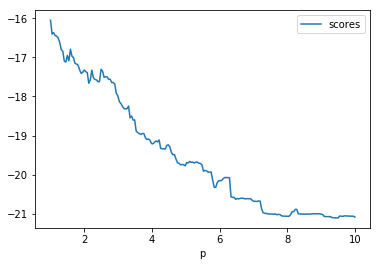

In [75]:
scoresdf.plot(x='p', y='scores')